# Design choices

During validation proecess, when choosing the best hyper-parameter of fully-connected feed-forward neural networks, we cannot experiment with all the possible choices of hyper-parameters due to time constraints. Hence, we sequentially select the hyper-parameters based on the following model-building process.

1) Preprocess: input scale($c$)

2) Building the model: number of hiddenlayers($nL$), number ot hidden units($nU$)

3) Compiling the model: learning rate($\eta$), momentum($\alpha$)

4) Training the model: batch size($B$)

That is, we experiment with different input scales, while fixing all the other hyper-parameters($nL = 1, nU = 100, \eta = 0.01, \alpha = 0, B = 32$). Then, with the best scale-hyper parameter, we choose the best $nL$, $nU$, while fixing $\eta = 0.01, \alpha = 0, B = 32$, and so on.

The hyper-parameters are selected from following sets:

\begin{gather*}
c \in \{1/100, 1/10, 1, 10, 100\} \\
nL \in \{0, 1, 2\} \\
nU \in \{1, 5, 10, 50, 100, 500, 1000\} \\
\eta \in \{0.001, 0.01, 0.1, 1\} \\
\alpha \in \{0, 0.001, 0.01, 0.1, 1\} \\
B \in \{8, 16, 32, 64, 128\}
\end{gather*}

Most of all, we select the best hyper-parameters based on overall accuracy of validation data. We repeat computing the accuracy of validation data for five times and test the value based on its mean and 95% confidence interval.(Assuming that the mean accuracy of five repetition is normally distributed.)

Experimenting with convolutional network, a series of hyper parameters were selected at the same time, not sequentally, and we choose the best hyper-parameter based on the overall classification accuracy of validation data without replication to save time.

# Fully-connected feed-forward neural network

## Sum-of-square error vs. cross-entropy error

### Hyperparameter for sum-of-square error; ReLU

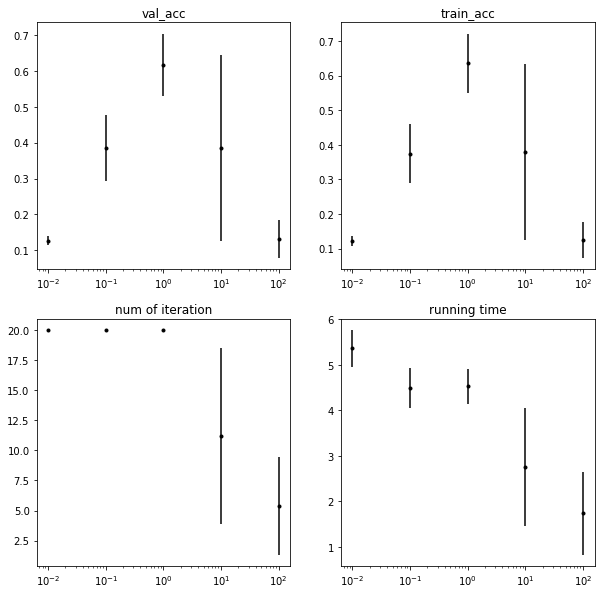

The best scale hyper parameter is scale = 1
Accuracy of validation set


,1,5,10,50,100,500,1000
0,"0.3137 (0.1465, 0.481)","0.3733 (0.312, 0.4347)","0.4068 (0.2608, 0.5528)","0.383 (0.2939, 0.4721)","0.4193 (0.337, 0.5017)","0.4058 (0.3155, 0.496)","0.4586 (0.4342, 0.4829)"
1,"0.1127 (0.0629, 0.1625)","0.268 (0.1978, 0.3382)","0.2918 (0.1849, 0.3986)","0.5127 (0.3805, 0.6448)","0.7409 (0.6861, 0.7957)","0.8497 (0.7484, 0.9509)","0.9621 (0.9538, 0.9704)"
2,"0.0988 (0.0887, 0.1089)","0.2146 (0.0902, 0.3391)","0.2871 (0.2358, 0.3383)","0.6562 (0.5002, 0.8122)","0.7791 (0.7174, 0.8408)","0.9284 (0.8671, 0.9897)","0.9697 (0.9653, 0.974)"


The best accuracy of validation set is attained when # of hidden layers = 2 , # of hidden units = 1000

Accuracy of training set


,1,5,10,50,100,500,1000
0,"0.3211 (0.1775, 0.4648)","0.3731 (0.3214, 0.4248)","0.4017 (0.2495, 0.5539)","0.3844 (0.3021, 0.4667)","0.4249 (0.332, 0.5178)","0.4015 (0.3279, 0.4752)","0.4608 (0.4407, 0.4808)"
1,"0.1222 (0.0727, 0.1717)","0.2663 (0.1954, 0.3372)","0.2889 (0.1956, 0.3823)","0.5277 (0.3811, 0.6744)","0.7443 (0.6758, 0.8129)","0.8585 (0.7569, 0.9602)","0.9772 (0.9741, 0.9802)"
2,"0.1023 (0.0991, 0.1055)","0.2162 (0.0881, 0.3442)","0.2929 (0.2583, 0.3276)","0.6604 (0.5068, 0.814)","0.7922 (0.7356, 0.8487)","0.9397 (0.8737, 1.0057)","0.9825 (0.9806, 0.9844)"


The best accuracy of training set is attained when # of hidden layers = 2 , # of hidden units = 1000

Number of iteration


,1,5,10,50,100,500,1000
0,"20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)"
1,"19.6 (18.4894, 20.7106)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)"
2,"13.2 (1.6385, 24.7615)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)"


The best number of iteration is attained when # of hidden layers = 2 , # of hidden units = 1

Running time


,1,5,10,50,100,500,1000
0,"4.8483 (3.7397, 5.9568)","4.936 (3.6262, 6.2457)","4.2386 (3.6518, 4.8254)","4.1315 (3.6236, 4.6393)","4.2627 (3.8658, 4.6595)","4.4446 (4.0107, 4.8785)","4.1836 (3.9625, 4.4046)"
1,"4.2021 (3.6386, 4.7657)","4.7875 (4.1744, 5.4005)","4.4798 (3.9958, 4.9639)","4.5196 (4.0604, 4.9787)","4.4486 (3.8622, 5.0349)","5.1474 (4.8221, 5.4728)","6.0417 (5.5014, 6.5819)"
2,"4.1231 (1.2625, 6.9836)","4.5684 (4.0676, 5.0693)","4.4961 (3.8515, 5.1406)","4.7277 (4.2084, 5.247)","4.8911 (4.5439, 5.2383)","12.4546 (11.9509, 12.9582)","34.3712 (31.0611, 37.6814)"


The best running time is attained when # of hidden layers = 2 , # of hidden units = 1

The best number of hidden layers is nHiddenlayers = 2
The best number of hidden units is nHiddenunits = 1000
Accuracy of validation set


,0.0,0.001,0.01,0.1,1.0
0.001,"0.7914 (0.7413, 0.8414)","0.8711 (0.8157, 0.9265)","0.7895 (0.7314, 0.8476)","0.7848 (0.722, 0.8477)","0.8784 (0.7896, 0.9673)"
0.01,"0.9689 (0.9665, 0.9713)","0.9503 (0.9049, 0.9957)","0.9686 (0.9647, 0.9726)","0.9715 (0.9667, 0.9763)","0.6112 (0.4991, 0.7234)"
0.1,"0.9786 (0.972, 0.9851)","0.9757 (0.9672, 0.9842)","0.9697 (0.9609, 0.9784)","0.9749 (0.9698, 0.98)","0.0993 (0.0912, 0.1075)"
1.0,"0.274 (-0.2191, 0.767)","0.0975 (0.0933, 0.1017)","0.0957 (0.09, 0.1014)","0.1007 (0.0898, 0.1115)","0.1035 (0.0917, 0.1153)"


Accuracy of training set


,0.0,0.001,0.01,0.1,1.0
0.001,"0.791 (0.7395, 0.8425)","0.8731 (0.8046, 0.9416)","0.781 (0.7179, 0.844)","0.7886 (0.7364, 0.8407)","0.8776 (0.7774, 0.9779)"
0.01,"0.9829 (0.9811, 0.9846)","0.9631 (0.9092, 1.017)","0.9836 (0.9827, 0.9846)","0.9844 (0.9822, 0.9867)","0.6037 (0.4812, 0.7262)"
0.1,"0.9945 (0.9903, 0.9987)","0.9917 (0.9858, 0.9976)","0.9878 (0.979, 0.9965)","0.9928 (0.9858, 0.9998)","0.1012 (0.0985, 0.104)"
1.0,"0.2806 (-0.2181, 0.7793)","0.1012 (0.1003, 0.1021)","0.1027 (0.1004, 0.105)","0.0992 (0.0952, 0.1032)","0.0993 (0.0952, 0.1034)"


Number of iteration


,0.0,0.001,0.01,0.1,1.0
0.001,"20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","5.8 (2.7083, 8.8917)"
0.01,"20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","4.4 (2.3223, 6.4777)"
0.1,"11.6 (7.6151, 15.5849)","8.8 (5.4683, 12.1317)","10.4 (5.7874, 15.0126)","10.2 (7.2356, 13.1644)","3.0 (3.0, 3.0)"
1.0,"4.4 (0.513, 8.287)","3.6 (1.9341, 5.2659)","3.0 (3.0, 3.0)","3.4 (2.2894, 4.5106)","3.0 (3.0, 3.0)"


Running time


,0.0,0.001,0.01,0.1,1.0
0.001,"35.8612 (34.692, 37.0305)","38.7949 (36.4439, 41.1459)","37.8698 (37.1626, 38.5769)","38.3274 (34.8935, 41.7613)","11.3099 (5.8704, 16.7493)"
0.01,"36.8232 (32.6254, 41.0209)","38.2655 (37.467, 39.0639)","39.3911 (36.0127, 42.7695)","35.8582 (35.3977, 36.3188)","9.8816 (5.822, 13.9411)"
0.1,"19.8715 (13.3599, 26.383)","16.65 (9.9745, 23.3255)","20.3154 (11.9734, 28.6575)","19.5185 (14.4659, 24.5711)","6.23 (5.6493, 6.8107)"
1.0,"8.5353 (1.2297, 15.841)","7.1028 (4.1091, 10.0966)","6.1477 (5.4858, 6.8095)","6.8892 (4.756, 9.0225)","6.3643 (5.2068, 7.5218)"


The best number of learning rate is eta = 0.1
The best number of momentum is alpha = 0


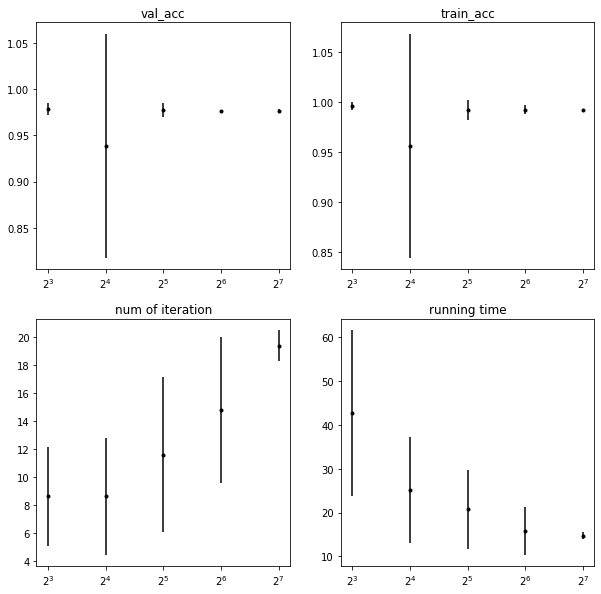

The best batch size hyper parameter is batch_size = 8


In [4]:
M = 5
scale = [1/100, 1/10, 1, 10, 100]
nHiddenlayers = [0, 1, 2]
nHiddenunits = [1, 5, 10, 50, 100, 500, 1000]
lr = [0.001, 0.01, 0.1, 1]
momentum = [0, 0.001, 0.01, 0.1, 1]
batch_size = [8, 16, 32, 64, 128]
scale1, nHiddenlayers1, nHiddenunits1, lr1, momentum1, batch_size1 = hyperpara(
    M = M, loss = "mse", activation = "relu", 
    scale = scale, nHiddenlayers = nHiddenlayers, nHiddenunits = nHiddenunits, 
    lr = lr, momentum = momentum, batch_size = batch_size
)

The hyper parameters are as follows:

In [5]:
scale1, nHiddenlayers1, nHiddenunits1, lr1, momentum1, batch_size1

(1, 2, 1000, 0.1, 0.0, 8)

### Performance of sum-of-square error; ReLU

In [29]:
overallacc_test1, classacc_test1, con_mat_test1, overallacc_train1, classacc_train1, con_mat_train1, model_summary = perform(
    loss = "mse", activation = "relu", scale = scale1, 
    nHiddenlayers = nHiddenlayers1, nHiddenunits = nHiddenunits1, 
    lr = lr1, momentum = momentum1, batch_size = batch_size1)
print(model_summary)

Model: "sequential_774"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1929 (Dense)           multiple                  65000     
_________________________________________________________________
dense_1930 (Dense)           multiple                  1001000   
_________________________________________________________________
dense_1931 (Dense)           multiple                  10010     
Total params: 1,076,010
Trainable params: 1,076,010
Non-trainable params: 0
_________________________________________________________________
None


In [30]:
print("Overall classification Accuracy for training data = %.4f\n" % overallacc_train1)
print("Class Accuracy for training data")
print(classacc_train1)
print("Confusion matrix for training data")
print(con_mat_train1)

print("-------------------------------------------------------------")

print("Overall classification Accuracy for test data = %.4f\n" % overallacc_test1)
print("Class Accuracy for test data")
print(classacc_test1)
print("Confusion matrix for test data")
print(con_mat_test1)

Overall classification Accuracy for training data = 0.9937

Class Accuracy for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      0.97      0.99       389
           2       0.99      0.99      0.99       380
           3       0.98      0.99      0.99       389
           4       0.99      1.00      1.00       387
           5       1.00      0.99      0.99       376
           6       0.99      1.00      1.00       377
           7       1.00      1.00      1.00       387
           8       0.99      1.00      0.99       380
           9       0.98      0.99      0.99       382

    accuracy                           0.99      3823
   macro avg       0.99      0.99      0.99      3823
weighted avg       0.99      0.99      0.99      3823

Confusion matrix for training data
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.97 0.01 0.01 0.   0.   0.   0.   0.01 0.01]
 [0.   

### Hyperparameter for cross-entropy error; ReLU

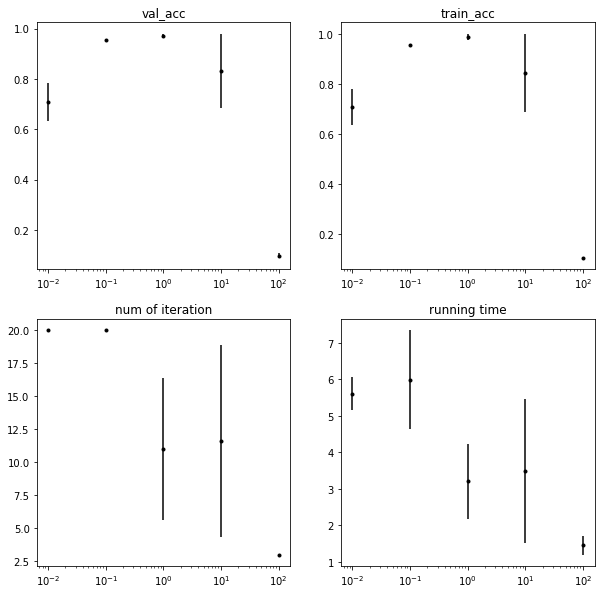

The best scale hyper parameter is scale = 1
Accuracy of validation set


,1,5,10,50,100,500,1000
0,"0.9519 (0.938, 0.9658)","0.9527 (0.9455, 0.9599)","0.9495 (0.9422, 0.9569)","0.9529 (0.9444, 0.9615)","0.9535 (0.9398, 0.9671)","0.9537 (0.9528, 0.9546)","0.948 (0.9293, 0.9666)"
1,"0.2055 (0.1914, 0.2196)","0.7169 (0.6067, 0.827)","0.9417 (0.9333, 0.9501)","0.9694 (0.9606, 0.9782)","0.9634 (0.9519, 0.9749)","0.9718 (0.9606, 0.9829)","0.9715 (0.958, 0.9851)"
2,"0.138 (0.061, 0.2151)","0.7827 (0.679, 0.8865)","0.9213 (0.9074, 0.9352)","0.9618 (0.9466, 0.977)","0.9668 (0.9534, 0.9802)","0.9757 (0.9679, 0.9834)","0.9791 (0.9706, 0.9876)"


The best accuracy of validation set is attained when # of hidden layers = 2 , # of hidden units = 1000

Accuracy of training set


,1,5,10,50,100,500,1000
0,"0.9641 (0.9486, 0.9796)","0.9617 (0.9515, 0.9719)","0.9646 (0.9529, 0.9763)","0.9657 (0.955, 0.9764)","0.9659 (0.9517, 0.9801)","0.9677 (0.9643, 0.9711)","0.9595 (0.9373, 0.9817)"
1,"0.2166 (0.2023, 0.2309)","0.7173 (0.6055, 0.8291)","0.9506 (0.9413, 0.9599)","0.9872 (0.9792, 0.9951)","0.9835 (0.9654, 1.0017)","0.9872 (0.9662, 1.0081)","0.9915 (0.9789, 1.0041)"
2,"0.15 (0.0714, 0.2286)","0.7801 (0.6709, 0.8894)","0.934 (0.9154, 0.9526)","0.9757 (0.9552, 0.9962)","0.9854 (0.971, 0.9998)","0.9919 (0.9804, 1.0034)","0.9954 (0.9863, 1.0044)"


The best accuracy of training set is attained when # of hidden layers = 2 , # of hidden units = 1000

Number of iteration


,1,5,10,50,100,500,1000
0,"13.4 (7.6026, 19.1974)","10.0 (8.0368, 11.9632)","12.8 (6.2063, 19.3937)","11.6 (6.5107, 16.6893)","11.6 (7.2453, 15.9547)","12.8 (9.8356, 15.7644)","9.6 (5.713, 13.487)"
1,"18.2 (13.8631, 22.5369)","20.0 (20.0, 20.0)","17.4 (14.5415, 20.2585)","16.6 (13.0228, 20.1772)","11.4 (6.8718, 15.9282)","9.8 (5.5529, 14.0471)","11.6 (10.1843, 13.0157)"
2,"10.2 (-0.9197, 21.3197)","19.0 (16.8494, 21.1506)","19.0 (16.2236, 21.7764)","9.8 (5.6446, 13.9554)","10.2 (4.9761, 15.4239)","8.2 (2.9761, 13.4239)","9.0 (5.8344, 12.1656)"


The best number of iteration is attained when # of hidden layers = 2 , # of hidden units = 500

Running time


,1,5,10,50,100,500,1000
0,"3.7904 (2.7422, 4.8385)","3.1506 (2.6559, 3.6453)","2.995 (1.7801, 4.2098)","2.603 (1.7264, 3.4796)","2.667 (1.886, 3.4481)","2.9298 (2.4055, 3.4541)","2.5962 (1.3278, 3.8647)"
1,"3.9249 (3.0998, 4.75)","4.4529 (4.2281, 4.6778)","3.9624 (3.4186, 4.5062)","3.8128 (3.093, 4.5327)","3.196 (1.7217, 4.6703)","3.0366 (1.9872, 4.086)","4.4194 (3.1511, 5.6877)"
2,"3.1359 (0.5627, 5.7091)","4.6688 (4.1208, 5.2168)","4.7631 (3.6867, 5.8395)","3.0814 (1.9755, 4.1874)","3.0701 (1.806, 4.3343)","5.6746 (2.3124, 9.0368)","15.545 (10.4807, 20.6093)"


The best running time is attained when # of hidden layers = 0 , # of hidden units = 1000

The best number of hidden layers is nHiddenlayers = 2
The best number of hidden units is nHiddenunits = 1000


C:\Users\ghkfk\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\ghkfk\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\ghkfk\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\ghkfk\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\ghkfk\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\callbacks.py:1225: RuntimeWarning: inv

Accuracy of validation set


,0.0,0.001,0.01,0.1,1.0
0.001,"0.9778 (0.9736, 0.9819)","0.977 (0.9725, 0.9815)","0.9736 (0.9718, 0.9754)","0.977 (0.9743, 0.9797)","0.9331 (0.9166, 0.9495)"
0.01,"0.9775 (0.974, 0.981)","0.9812 (0.9782, 0.9841)","0.9807 (0.9771, 0.9842)","0.9783 (0.9715, 0.9851)","0.103 (0.0923, 0.1137)"
0.1,"0.0868 (0.0533, 0.1203)","0.1545 (-0.0042, 0.3132)","0.1294 (0.0505, 0.2084)","0.1001 (0.089, 0.1113)","0.0986 (0.0896, 0.1075)"
1.0,"0.1163 (0.1163, 0.1163)","0.1163 (0.1163, 0.1163)","0.1163 (0.1163, 0.1163)","0.1163 (0.1163, 0.1163)","0.1163 (0.1163, 0.1163)"


Accuracy of training set


,0.0,0.001,0.01,0.1,1.0
0.001,"0.9889 (0.9874, 0.9904)","0.9884 (0.9879, 0.9888)","0.9874 (0.9854, 0.9895)","0.9897 (0.9879, 0.9914)","0.941 (0.9247, 0.9573)"
0.01,"0.9952 (0.9882, 1.0022)","0.9988 (0.9973, 1.0004)","0.9976 (0.9937, 1.0015)","0.9944 (0.983, 1.0057)","0.0994 (0.0952, 0.1036)"
0.1,"0.0908 (0.0565, 0.1252)","0.1631 (-0.0015, 0.3277)","0.1345 (0.0382, 0.2308)","0.1051 (0.099, 0.1112)","0.1005 (0.0979, 0.1031)"
1.0,"0.0939 (0.0939, 0.0939)","0.0939 (0.0939, 0.0939)","0.0939 (0.0939, 0.0939)","0.0939 (0.0939, 0.0939)","0.0939 (0.0939, 0.0939)"


Number of iteration


,0.0,0.001,0.01,0.1,1.0
0.001,"20.0 (20.0, 20.0)","19.8 (19.2447, 20.3553)","19.2 (16.9788, 21.4212)","20.0 (20.0, 20.0)","3.2 (2.6447, 3.7553)"
0.01,"8.0 (5.366, 10.634)","11.6 (7.3347, 15.8653)","12.2 (7.9529, 16.4471)","8.0 (7.122, 8.878)","5.4 (2.9796, 7.8204)"
0.1,"5.6 (2.6097, 8.5903)","4.0 (2.7583, 5.2417)","4.8 (2.1081, 7.4919)","6.4 (1.6232, 11.1768)","3.6 (2.4894, 4.7106)"
1.0,"2.0 (2.0, 2.0)","2.0 (2.0, 2.0)","2.0 (2.0, 2.0)","2.0 (2.0, 2.0)","2.0 (2.0, 2.0)"


Running time


,0.0,0.001,0.01,0.1,1.0
0.001,"37.2381 (35.571, 38.9051)","37.5127 (36.1891, 38.8362)","37.7447 (36.6437, 38.8457)","38.0553 (36.6778, 39.4328)","7.1389 (4.7695, 9.5083)"
0.01,"15.124 (9.8695, 20.3786)","22.4873 (14.1709, 30.8037)","24.6693 (16.274, 33.0646)","15.5267 (14.046, 17.0074)","10.744 (6.4237, 15.0644)"
0.1,"10.256 (5.2182, 15.2938)","8.7716 (5.9519, 11.5914)","10.3525 (5.086, 15.6191)","13.2596 (5.1107, 21.4085)","7.3667 (5.3557, 9.3777)"
1.0,"4.1432 (3.725, 4.5613)","4.3917 (3.9316, 4.8519)","5.0448 (3.7513, 6.3383)","4.5745 (4.2409, 4.9081)","4.6572 (4.3282, 4.9862)"


The best number of learning rate is eta = 0.01
The best number of momentum is alpha = 0.001


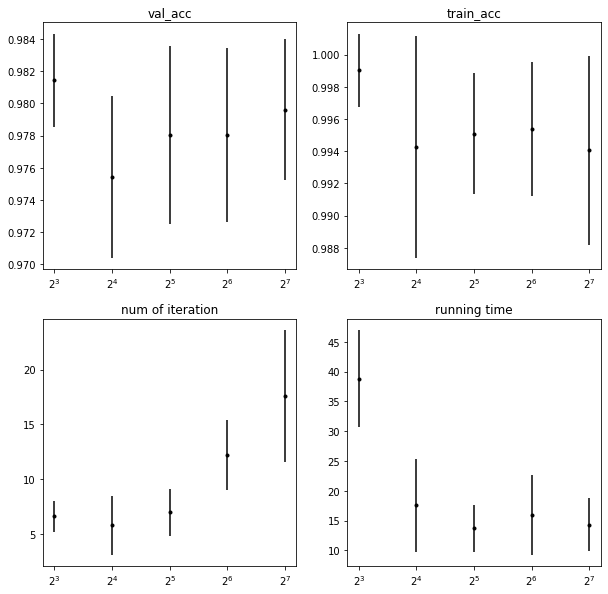

The best batch size hyper parameter is batch_size = 8


In [6]:
scale2, nHiddenlayers2, nHiddenunits2, lr2, momentum2, batch_size2 = hyperpara(
    M = M, loss = "categorical_crossentropy", activation = "relu", 
    scale = scale, nHiddenlayers = nHiddenlayers, nHiddenunits = nHiddenunits, 
    lr = lr, momentum = momentum, batch_size = batch_size
)

The hyper parameters are as follows:

In [7]:
scale2, nHiddenlayers2, nHiddenunits2, lr2, momentum2, batch_size2

(1, 2, 1000, 0.01, 0.001, 8)

### Performance of cross-entropy error; ReLU

In [31]:
overallacc_test2, classacc_test2, con_mat_test2, overallacc_train2, classacc_train2, con_mat_train2, model_summary = perform(
    loss = "categorical_crossentropy", activation = "relu", scale = scale2, 
    nHiddenlayers = nHiddenlayers2, nHiddenunits = nHiddenunits2, 
    lr = lr2, momentum = momentum2, batch_size = batch_size2)
print(model_summary)

Model: "sequential_775"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1932 (Dense)           multiple                  65000     
_________________________________________________________________
dense_1933 (Dense)           multiple                  1001000   
_________________________________________________________________
dense_1934 (Dense)           multiple                  10010     
Total params: 1,076,010
Trainable params: 1,076,010
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
print("Overall classification Accuracy for training data = %.4f\n" % overallacc_train2)
print("Class Accuracy for training data")
print(classacc_train2)
print("Confusion matrix for training data")
print(con_mat_train2)

print("-------------------------------------------------------------")

print("Overall classification Accuracy for test data = %.4f\n" % overallacc_test2)
print("Class Accuracy for test data")
print(classacc_test2)
print("Confusion matrix for test data")
print(con_mat_test2)

Overall classification Accuracy for training data = 0.9801

Class Accuracy for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       0.96      0.98      0.97       389
           2       1.00      0.93      0.96       380
           3       0.99      0.99      0.99       389
           4       0.99      1.00      1.00       387
           5       1.00      0.95      0.98       376
           6       0.99      1.00      0.99       377
           7       1.00      0.99      1.00       387
           8       0.91      0.99      0.95       380
           9       0.97      0.97      0.97       382

    accuracy                           0.98      3823
   macro avg       0.98      0.98      0.98      3823
weighted avg       0.98      0.98      0.98      3823

Confusion matrix for training data
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.98 0.   0.   0.   0.   0.   0.   0.01 0.01]
 [0.   

### Discussion
The hyper parameters with sum-of-square-error and cross-entropy error functions are(scale, nHiddenlayers, nHiddenunits, lr, momentum, batch_size)

sum-of-square-error: (1, 2, 1000, 0.1, 0.0, 8)

cross-entropy error: (1, 2, 1000, 0.01, 0.001, 8)

Both error functions share the same scale, number of hidden layers, number of hidden units batch_size hyper parameter execept lr and momentum hyper parameters. While both sum-of-square and cross-entropy error functions performs best with number of hiddenlayers = 2, nuber of hidden units = 1000, it turns out that it takes about 34.37 seconds to fit the model with sum-of-square error functnion while it takes only 15.55 seconds to fit the model with cross-entropy error function.

The overall classification accuracies for test data of sum-of-square error function and cross-entropy error function are 0.9649 and 0.9505 respectively, which indicates that both loss function performs well in this problem.

## tanh vs. ReLU hidden units

### Hyperparameter for tanh; cross-entropy

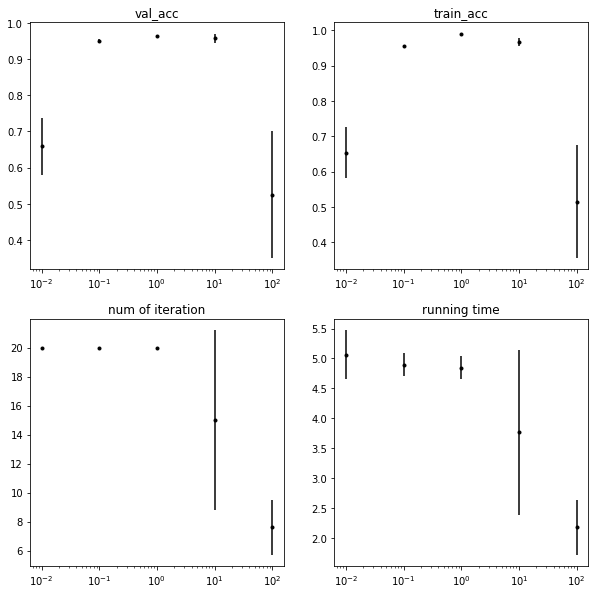

The best scale hyper parameter is scale = 1
Accuracy of validation set


,1,5,10,50,100,500,1000
0,"0.9451 (0.9318, 0.9584)","0.9456 (0.9363, 0.9549)","0.9464 (0.9287, 0.9641)","0.9556 (0.9486, 0.9625)","0.9532 (0.9461, 0.9603)","0.9435 (0.9273, 0.9597)","0.9522 (0.9393, 0.965)"
1,"0.1856 (0.1799, 0.1914)","0.7354 (0.6181, 0.8527)","0.8426 (0.7563, 0.9289)","0.9579 (0.9513, 0.9645)","0.9684 (0.9613, 0.9755)","0.9812 (0.9785, 0.9839)","0.9799 (0.9758, 0.9839)"
2,"0.1658 (0.1164, 0.2151)","0.5694 (0.3729, 0.766)","0.8735 (0.8119, 0.935)","0.9626 (0.9602, 0.9651)","0.971 (0.9681, 0.9739)","0.9801 (0.9764, 0.9838)","0.9814 (0.9785, 0.9843)"


The best accuracy of validation set is attained when # of hidden layers = 2 , # of hidden units = 1000

Accuracy of training set


,1,5,10,50,100,500,1000
0,"0.9553 (0.9394, 0.9712)","0.957 (0.9446, 0.9694)","0.9553 (0.9401, 0.9705)","0.9695 (0.9598, 0.9793)","0.9682 (0.9648, 0.9716)","0.9571 (0.9438, 0.9704)","0.96 (0.9464, 0.9737)"
1,"0.1961 (0.1891, 0.203)","0.7453 (0.6465, 0.8442)","0.8464 (0.7642, 0.9287)","0.9781 (0.9761, 0.9801)","0.9888 (0.9864, 0.9911)","0.9983 (0.9979, 0.9987)","0.998 (0.9959, 1.0002)"
2,"0.1772 (0.1239, 0.2305)","0.5759 (0.3836, 0.7682)","0.8892 (0.8367, 0.9417)","0.9839 (0.9811, 0.9867)","0.9925 (0.9916, 0.9935)","0.999 (0.9985, 0.9995)","0.9993 (0.9985, 1.0002)"


The best accuracy of training set is attained when # of hidden layers = 2 , # of hidden units = 1000

Number of iteration


,1,5,10,50,100,500,1000
0,"9.8 (6.2444, 13.3556)","9.0 (5.0735, 12.9265)","10.0 (6.275, 13.725)","13.6 (8.9046, 18.2954)","13.6 (9.8134, 17.3866)","9.2 (4.4394, 13.9606)","10.8 (6.3751, 15.2249)"
1,"20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","17.2 (12.4394, 21.9606)"
2,"16.2 (8.6269, 23.7731)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","19.6 (18.4894, 20.7106)","16.8 (12.9329, 20.6671)"


The best number of iteration is attained when # of hidden layers = 0 , # of hidden units = 5

Running time


,1,5,10,50,100,500,1000
0,"2.9018 (1.5692, 4.2344)","2.1969 (1.5602, 2.8336)","2.3947 (1.6902, 3.0992)","2.9589 (2.2405, 3.6773)","3.0301 (2.4838, 3.5763)","2.2427 (1.45, 3.0354)","3.2723 (1.9645, 4.5801)"
1,"4.6154 (3.7463, 5.4845)","5.0047 (4.7121, 5.2972)","5.7053 (4.2846, 7.1259)","5.4271 (5.2689, 5.5853)","5.6397 (5.5408, 5.7386)","6.5808 (6.5193, 6.6423)","6.7889 (5.1585, 8.4192)"
2,"4.4141 (2.7882, 6.0399)","5.2838 (5.1783, 5.3894)","5.3122 (5.082, 5.5424)","6.9711 (5.8298, 8.1125)","6.6663 (5.9822, 7.3504)","16.3064 (15.6433, 16.9695)","36.1894 (28.4915, 43.8873)"


The best running time is attained when # of hidden layers = 0 , # of hidden units = 5

The best number of hidden layers is nHiddenlayers = 2
The best number of hidden units is nHiddenunits = 1000
Accuracy of validation set


,0.0,0.001,0.01,0.1,1.0
0.001,"0.9699 (0.9641, 0.9758)","0.9705 (0.968, 0.9729)","0.9692 (0.9664, 0.9719)","0.9736 (0.9718, 0.9754)","0.9315 (0.9021, 0.9609)"
0.01,"0.9833 (0.9825, 0.984)","0.9812 (0.9778, 0.9845)","0.9809 (0.9785, 0.9834)","0.9822 (0.9808, 0.9837)","0.5906 (0.2999, 0.8813)"
0.1,"0.9807 (0.9782, 0.9831)","0.9516 (0.9035, 0.9997)","0.977 (0.9745, 0.9795)","0.959 (0.9306, 0.9873)","0.1004 (0.0918, 0.1089)"
1.0,"0.0949 (0.0924, 0.0974)","0.0991 (0.0943, 0.1039)","0.0946 (0.0925, 0.0968)","0.0986 (0.0896, 0.1075)","0.0991 (0.0906, 0.1075)"


Accuracy of training set


,0.0,0.001,0.01,0.1,1.0
0.001,"0.9802 (0.9781, 0.9823)","0.9806 (0.9793, 0.982)","0.9807 (0.9777, 0.9837)","0.9818 (0.98, 0.9836)","0.9408 (0.9163, 0.9653)"
0.01,"0.9994 (0.9989, 0.9999)","0.999 (0.9984, 0.9995)","0.9983 (0.996, 1.0006)","0.9995 (0.999, 0.9999)","0.5944 (0.3055, 0.8833)"
0.1,"0.9993 (0.9979, 1.0008)","0.965 (0.9123, 1.0177)","0.9986 (0.9971, 1.0)","0.9788 (0.9451, 1.0126)","0.1007 (0.099, 0.1023)"
1.0,"0.1016 (0.0987, 0.1044)","0.101 (0.0995, 0.1025)","0.1014 (0.0983, 0.1045)","0.1013 (0.0985, 0.1041)","0.1005 (0.0989, 0.1021)"


Number of iteration


,0.0,0.001,0.01,0.1,1.0
0.001,"20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","20.0 (20.0, 20.0)","3.8 (2.7611, 4.8389)"
0.01,"18.6 (15.3621, 21.8379)","16.0 (13.6771, 18.3229)","14.4 (9.0883, 19.7117)","16.8 (13.2444, 20.3556)","3.4 (2.2894, 4.5106)"
0.1,"8.4 (7.2894, 9.5106)","5.8 (1.9329, 9.6671)","8.0 (5.5167, 10.4833)","7.0 (4.366, 9.634)","3.0 (3.0, 3.0)"
1.0,"4.4 (2.5169, 6.2831)","4.8 (2.2553, 7.3447)","4.4 (2.3223, 6.4777)","4.2 (1.9788, 6.4212)","3.2 (2.6447, 3.7553)"


Running time


,0.0,0.001,0.01,0.1,1.0
0.001,"44.5608 (39.3065, 49.8151)","40.7789 (37.6618, 43.8961)","39.2682 (38.3077, 40.2287)","38.3548 (35.1931, 41.5165)","7.8869 (5.8394, 9.9344)"
0.01,"33.9763 (31.4048, 36.5478)","31.326 (25.0502, 37.6018)","30.9453 (18.3613, 43.5292)","33.8614 (26.8954, 40.8274)","7.4286 (5.3887, 9.4686)"
0.1,"18.2347 (13.2328, 23.2367)","13.5977 (6.7779, 20.4174)","15.7629 (11.2347, 20.2911)","13.7705 (8.8854, 18.6557)","6.7206 (6.3831, 7.058)"
1.0,"9.4033 (5.4607, 13.3459)","11.4684 (6.3221, 16.6147)","10.1869 (5.9648, 14.4091)","9.3612 (4.9056, 13.8167)","7.133 (6.2115, 8.0544)"


The best number of learning rate is eta = 0.01
The best number of momentum is alpha = 0


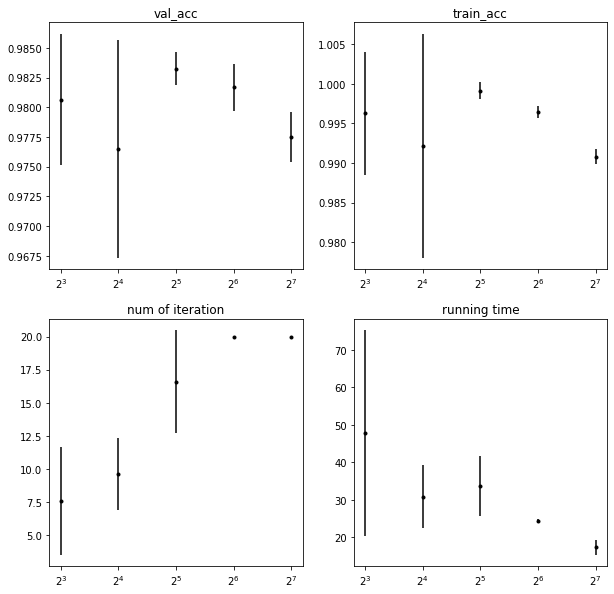

The best batch size hyper parameter is batch_size = 32


In [8]:
scale3, nHiddenlayers3, nHiddenunits3, lr3, momentum3, batch_size3 = hyperpara(
    M = M, loss = "categorical_crossentropy", activation = "tanh", 
    scale = scale, nHiddenlayers = nHiddenlayers, nHiddenunits = nHiddenunits, 
    lr = lr, momentum = momentum, batch_size = batch_size
)

The hyper parameters are as follows:

In [9]:
scale3, nHiddenlayers3, nHiddenunits3, lr3, momentum3, batch_size3

(1, 2, 1000, 0.01, 0.0, 32)

### Performance of tanh; cross-entropy

In [90]:
overallacc_test3, classacc_test3, con_mat_test3, overallacc_train3, classacc_train3, con_mat_train3, model_summary = perform(
    loss = "categorical_crossentropy", activation = "tanh", scale = scale3, 
    nHiddenlayers = nHiddenlayers3, nHiddenunits = nHiddenunits3, 
    lr = lr3, momentum = momentum3, batch_size = batch_size3)
print(model_summary)

Model: "sequential_811"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1980 (Dense)           multiple                  65000     
_________________________________________________________________
dense_1981 (Dense)           multiple                  1001000   
_________________________________________________________________
dense_1982 (Dense)           multiple                  10010     
Total params: 1,076,010
Trainable params: 1,076,010
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
print("Overall classification Accuracy for training data = %.4f\n" % overallacc_train3)
print("Class Accuracy for training data")
print(classacc_train3)
print("Confusion matrix for training data")
print(con_mat_train3)

print("-------------------------------------------------------------")

print("Overall classification Accuracy for test data = %.4f\n" % overallacc_test3)
print("Class Accuracy for test data")
print(classacc_test3)
print("Confusion matrix for test data")
print(con_mat_test3)

Overall classification Accuracy for training data = 0.9948

Class Accuracy for training data
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       376
           1       0.99      0.99      0.99       389
           2       1.00      1.00      1.00       380
           3       0.99      0.99      0.99       389
           4       0.99      0.99      0.99       387
           5       1.00      0.99      0.99       376
           6       0.99      0.99      0.99       377
           7       1.00      1.00      1.00       387
           8       1.00      0.99      1.00       380
           9       0.98      0.99      0.99       382

    accuracy                           0.99      3823
   macro avg       0.99      0.99      0.99      3823
weighted avg       0.99      0.99      0.99      3823

Confusion matrix for training data
[[0.99 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.99 0.   0.   0.   0.   0.   0.   0.   0.01]
 [0.   

### Hyperparameter for ReLU; cross-entropy error

The hyper parameters are as follows:

In [7]:
scale2, nHiddenlayers2, nHiddenunits2, lr2, momentum2, batch_size2

(1, 2, 1000, 0.01, 0.001, 8)

### Performance of ReLU; cross-entropy error

In [35]:
print("Overall classification Accuracy for training data = %.4f\n" % overallacc_train2)
print("Class Accuracy for training data")
print(classacc_train2)
print("Confusion matrix for training data")
print(con_mat_train2)

print("-------------------------------------------------------------")

print("Overall classification Accuracy for test data = %.4f\n" % overallacc_test2)
print("Class Accuracy for test data")
print(classacc_test2)
print("Confusion matrix for test data")
print(con_mat_test2)

Overall classification Accuracy for training data = 0.9801

Class Accuracy for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       0.96      0.98      0.97       389
           2       1.00      0.93      0.96       380
           3       0.99      0.99      0.99       389
           4       0.99      1.00      1.00       387
           5       1.00      0.95      0.98       376
           6       0.99      1.00      0.99       377
           7       1.00      0.99      1.00       387
           8       0.91      0.99      0.95       380
           9       0.97      0.97      0.97       382

    accuracy                           0.98      3823
   macro avg       0.98      0.98      0.98      3823
weighted avg       0.98      0.98      0.98      3823

Confusion matrix for training data
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.98 0.   0.   0.   0.   0.   0.   0.01 0.01]
 [0.   

### Discussion
The hyper parameters with tanh and ReLu hidden units are(scale, nHiddenlayers, nHiddenunits, lr, momentum, batch_size)

tanh: (1, 2, 1000, 0.01, 0.0, 32)

ReLu: (1, 2, 1000, 0.01, 0.001, 8)

Both error functions share the same scale, number of hidden layers, number of hidden units, and lr hyper parameter execept batch size and momentum hyper parameters. Observe that running time decreases as we increase the batch size regardless of loss function or activation function. Hence we might want to increase the batch size in order to same time in the other case.

The overall classification accuracies for test data of tanh activation function and ReLu activation function are 0.9588 and 0.9505 respectively, which indicates that both loss function performs well in this problem.

## Convolutional Neural Network

### Hyperparameter for ReLU; cross-entropy error

In [75]:
filtersize = [5, 10, 20]
nconv = [1,1,1,1,1,1,1,1,2,2,2]
height = [1,1,2,2,2,3,3,3,1,2,2]
pool_size = [2,3,1,2,3,1,2,3,2,1,2]

res = np.empty((0, 8))
for i in range(len(filtersize)):
    for j in range(len(nconv)):
        #print(i, j)
        tmp1, tmp2, tmp3, tmp4 = validation2(filtersize = filtersize[i], nconv = nconv[j],
                                           height = height[j], pool_size = pool_size[j])
        res = np.append(res, np.array([(filtersize[i], nconv[j], height[j], pool_size[j], 
                                       tmp1, tmp2, tmp3, tmp4)]), axis = 0)

In [76]:
res2 = pd.DataFrame(res, columns=["filtersize", "nconv", "height", "pool_size",
                                "running time", "numofIter", "train_acc", "val_acc"]).round(4)
print(res2.to_string(index=False))

 filtersize  nconv  height  pool_size  running time  numofIter  train_acc  val_acc
        5.0    1.0     1.0        2.0        2.0940        5.0     0.7780   0.8105
        5.0    1.0     1.0        3.0        1.3882        3.0     0.1037   0.0915
        5.0    1.0     2.0        1.0        2.0687        5.0     0.9529   0.9582
        5.0    1.0     2.0        2.0        2.3915        5.0     0.8793   0.8915
        5.0    1.0     2.0        3.0        2.5264        5.0     0.4712   0.4340
        5.0    1.0     3.0        1.0        2.5608        5.0     0.9601   0.9582
        5.0    1.0     3.0        2.0        2.8243        5.0     0.8986   0.9046
        5.0    1.0     3.0        3.0        3.4226        5.0     0.4519   0.4366
        5.0    2.0     1.0        2.0        1.9732        3.0     0.1037   0.0915
        5.0    2.0     2.0        1.0        4.2099        5.0     0.9418   0.9373
        5.0    2.0     2.0        2.0        3.2883        5.0     0.2511   0.2523
    

In [79]:
print(res2.iloc[[res[:,7].argmax()]].to_string(index=False))
filtersize5, nconv5, height5, pool_size5 = res[res[:,7].argmax(),:4].reshape(4).astype("int")

 filtersize  nconv  height  pool_size  running time  numofIter  train_acc  val_acc
       20.0    2.0     2.0        1.0          3.55        5.0     0.9738   0.9765
20


In [81]:
batch_size = [16, 32]
lr = [0.01, 0.1]
momentum = [0, 0.01]

res = np.empty((0, 7))
for i in range(len(batch_size)):
    for j in range(len(lr)):
        for k in range(len(momentum)):
            tmp1, tmp2, tmp3, tmp4 = validation2(filtersize = filtersize5, nconv = nconv5,
                                             height = height5, pool_size = pool_size5,
                                            batch_size = batch_size[i], lr = lr[j], momentum = momentum[k])
            res = np.append(res, np.array([(batch_size[i], lr[j], momentum[k],
                                       tmp1, tmp2, tmp3, tmp4)]), axis = 0)

In [82]:
res2 = pd.DataFrame(res, columns=["batch_size", "lr", "momentum",
                                "running time", "numofIter", "train_acc", "val_acc"]).round(4)
print(res2.to_string(index=False))

 batch_size    lr  momentum  running time  numofIter  train_acc  val_acc
       16.0  0.01      0.00        5.0396        5.0     0.9722   0.9725
       16.0  0.01      0.01        4.9593        5.0     0.9823   0.9712
       16.0  0.10      0.00        5.6145        5.0     0.9912   0.9778
       16.0  0.10      0.01        5.0569        5.0     0.9716   0.9686
       32.0  0.01      0.00        3.2989        5.0     0.9755   0.9752
       32.0  0.01      0.01        3.6006        5.0     0.9768   0.9712
       32.0  0.10      0.00        3.5622        5.0     0.9931   0.9856
       32.0  0.10      0.01        3.5290        5.0     0.9513   0.9464


In [86]:
print(res2.iloc[[res[:,6].argmax()]].to_string(index=False))
batch_size5, lr5, momentum5 = res[res[:,6].argmax(),:3].reshape(3)
batch_size5 = int(batch_size5)

 batch_size   lr  momentum  running time  numofIter  train_acc  val_acc
       32.0  0.1       0.0        3.5622        5.0     0.9931   0.9856


### Performance of ReLU; cross-entropy error

In [87]:
overallacc_test5, classacc_test5, con_mat_test5, overallacc_train5, classacc_train5, con_mat_train5, model_summary = perform2(
    filtersize = filtersize5, height = height5, nconv = nconv5, pool_size = pool_size5,
                lr = lr5, epoch = 50,
                momentum = momentum5, batch_size = batch_size5
)
print(model_summary)

Model: "sequential_249"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_312 (Conv2D)          (None, 7, 7, 20)          100       
_________________________________________________________________
max_pooling2d_307 (MaxPoolin (None, 7, 7, 20)          0         
_________________________________________________________________
conv2d_313 (Conv2D)          (None, 6, 6, 20)          1620      
_________________________________________________________________
max_pooling2d_308 (MaxPoolin (None, 6, 6, 20)          0         
_________________________________________________________________
flatten_244 (Flatten)        (None, 720)               0         
_________________________________________________________________
dense_244 (Dense)            (None, 10)                7210      
Total params: 8,930
Trainable params: 8,930
Non-trainable params: 0
__________________________________________________

In [88]:
print("Overall classification Accuracy for training data = %.4f\n" % overallacc_train5)
print("Class Accuracy for training data")
print(classacc_train5)
print("Confusion matrix for training data")
print(con_mat_train5)

print("-------------------------------------------------------------")

print("Overall classification Accuracy for test data = %.4f\n" % overallacc_test5)
print("Class Accuracy for test data")
print(classacc_test5)
print("Confusion matrix for test data")
print(con_mat_test5)

Overall classification Accuracy for training data = 0.9812

Class Accuracy for training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       376
           1       1.00      0.89      0.94       389
           2       0.99      1.00      0.99       380
           3       0.99      0.99      0.99       389
           4       0.97      0.98      0.98       387
           5       0.98      1.00      0.99       376
           6       0.99      0.99      0.99       377
           7       1.00      1.00      1.00       387
           8       0.93      0.99      0.96       380
           9       0.97      0.97      0.97       382

    accuracy                           0.98      3823
   macro avg       0.98      0.98      0.98      3823
weighted avg       0.98      0.98      0.98      3823

Confusion matrix for training data
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.89 0.01 0.01 0.01 0.   0.   0.   0.07 0.01]
 [0.   

### Discussion

For convolution network, the number of convolutional layout and height and pool_size are limited because of the small input size($8 \times 8)$. Hence, we choosed the best hyper parameter based on limited hyper-parameter candidates as described above. Note thate the validation accuracies vary a lot depending on the hyper parameter for model structure(filtersize, number of convolutional layout, height, and pool_size).

The best hyper-parameter based on validation accuracy is

filtersize = 20, number of convolutional layout = 2  height = 2  pool_size = 1.

batch_size = 32, lr = 0.1, momentum = 0.0

Overall classification accuracy for training data is 0.9812 and that for test data is 0.9482, which are acceptable. We can check that running time of convolutional networks is shorter compared to that of feed-forward network.

# Data import and functions defined

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import csv

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pandas as pd

from timeit import default_timer as timer

import scipy.stats

Using TensorFlow backend.


In [2]:
print(tf.__version__)
print(keras.__version__)
print(pd.__version__)
print(np.__version__)

2.0.0
2.2.4-tf
0.25.1
1.16.5


In [3]:
TRAIN_DATA_URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra"
TEST_DATA_URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes"

train_file_path = tf.keras.utils.get_file("optdigits.tra", TRAIN_DATA_URL)
test_file_path = tf.keras.utils.get_file("optdigits.tes", TEST_DATA_URL)

train_labels = []
train_images = []
with open(train_file_path, "r") as f:
    rdr = csv.reader(f)
    for line in rdr:
        train_labels.append(int(line[64]))
        train_images.append([int(i) for i in line[0:64]])

test_labels = []
test_images = []
with open(test_file_path, "r") as f:
    rdr = csv.reader(f)
    for line in rdr:
        test_labels.append(int(line[64]))
        test_images.append([int(i) for i in line[0:64]])
        
train_labels = np.array(train_labels)
train_images = np.array(train_images)
test_labels = np.array(test_labels)
test_images = np.array(test_images)
train_labels_full = train_labels
train_images_full = train_images

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.20, shuffle= True)

train_cnn_full = train_images_full.reshape(train_images_full.shape[0], 8, 8, 1).astype('float32')
test_cnn = test_images.reshape(test_images.shape[0], 8, 8, 1).astype('float32')

train_cnn, val_cnn, train_cnn_labels, val_cnn_labels = train_test_split(train_cnn_full, train_labels_full, 
                                                                        test_size=0.20, shuffle= True)

encoded_train_labels = to_categorical(train_labels)
encoded_val_labels = to_categorical(val_labels)
encoded_test_labels = to_categorical(test_labels)
encoded_train_labels_full = to_categorical(train_labels_full)

encoded_train_labels_cnn = to_categorical(train_cnn_labels)
encoded_val_labels_cnn = to_categorical(val_cnn_labels)
encoded_test_labels_cnn = to_categorical(test_labels)
encoded_train_labels_full_cnn = to_categorical(train_labels_full)

In [89]:
def validation1(loss, activation, scale = 1, nHiddenlayers = 1, nHiddenunits = 100, lr = 0.01,
                momentum = 0.0, batch_size = 32, verbose = 0):
    #loss = "categorical_crossentropy"
    
    model = keras.Sequential()

    for i in range(int(nHiddenlayers)):
        model.add(keras.layers.Dense(nHiddenunits, activation=activation))

    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.SGD(lr = lr, momentum = momentum),
              loss= loss,
              metrics=['accuracy'])

    callbacks = [
        # Interrupt training if `val_loss` stops improving for over 2 epochs
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')
        ]
    
    start = timer()
    modelFit = model.fit(train_images*scale, encoded_train_labels , epochs=20, callbacks=callbacks,
         validation_data=(val_images*scale, encoded_val_labels), verbose = verbose, batch_size = batch_size)
    end = timer()
    
    time = end - start
    num_iter = len(modelFit.history['loss'])
    
    train_acc = model.evaluate(train_images, encoded_train_labels, verbose=0)[1]
    val_acc = model.evaluate(val_images, encoded_val_labels, verbose=0)[1]
    
    return time, num_iter, train_acc, val_acc

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m-h,m, m+h, h

def performance(M, loss, activation, scale = [1], nHiddenlayers = [1], nHiddenunits = [100], 
                lr = [0.01], momentum = [0.0], batch_size = [32]):
    res = np.empty((0, 8))
    for i1 in scale:
        for i2 in nHiddenlayers:
            for i3 in nHiddenunits:
                for i4 in lr:
                    for i5 in momentum:
                        for i6 in batch_size:
                            res2 = np.empty((0, 4))
                            for i in range(M):
                                res2 = np.append(
                                    res2, np.array([
                                        validation1(scale = i1, nHiddenlayers = i2,
                                                   nHiddenunits = i3, lr = i4,
                                                   momentum = i5, batch_size = i6,
                                                   loss = loss, activation = activation)]), axis = 0)
                            res = np.append(res, np.array([np.reshape(np.apply_along_axis(mean_confidence_interval, 0, res2)[[1,3],:], 8, order = 'F')]), axis = 0)
    return(res)

def plotCI(res,  x, xscale = "linear", basex = 2):
    plt.figure(figsize=(10,10))
    plotLabel = ["val_acc", "train_acc", "num of iteration", "running time"]
    for i in range(4):
        plt.subplot(2, 2, (i + 1))
        plt.errorbar(x, res[:,(6-2*i)], yerr=res[:,(7-2*i)], fmt='.k');
        plt.title(plotLabel[i])
        if(xscale == "linear"): 
            plt.xscale("linear")
        elif(xscale == "log"): 
            plt.xscale('log', basex=basex)
            
def TablePerf(res, row, col, val = 0):
    if(val == 0): attr = "Accuracy of validation set"
    elif(val == 1): attr = "Accuracy of training set"
    elif(val == 2): attr = "Number of iteration"
    elif(val == 3): attr = "Running time"
    elif(val == 4):
        mean1 = np.reshape(res, (len(row), len(col), 8))[:,:,6-2*0].reshape(len(row), len(col))
        df = pd.DataFrame(mean1, columns = col, index = row).round(4)
        return df.stack().index[np.argmax(df.values)]
    mean = np.reshape(res, (len(row), len(col), 8))[:,:,6-2*val].reshape(len(row), len(col))
    size = np.reshape(res, (len(row), len(col), 8))[:,:,7-2*val].reshape(len(row), len(col))
    ui = mean + size
    li = mean - size

    df = pd.DataFrame(mean, columns=col, index=row).round(4)
    dfm = df.applymap(str)
    dfu = pd.DataFrame(ui, columns=col, index=row).round(4).applymap(str)
    dfl = pd.DataFrame(li, columns=col, index=row).round(4).applymap(str)
    
    dfm = dfm.apply(lambda x: x + " (" + dfl[x.name] + ", "+ dfu[x.name] + ")" )
    if(val ==  0 or val == 1): 
        bool_matrix = df == df.max().max()
        tmp = df.stack().index[np.argmax(df.values)]
    elif(val == 2 or val == 3):
        bool_matrix = df == df.min().min()
        tmp = df.stack().index[np.argmin(df.values)]
    def highlight(value):
        return bool_matrix.applymap(lambda x: 'background-color: yellow' if x else '')
    
    #print("The best " + attr + " is attained when # of hidden layers = %g , # of hidden units = %g\n" % tmp)

    print(attr)
    return(tmp, dfm.style.apply(highlight, axis=None))

def hyperpara(M, loss, activation, scale, nHiddenlayers, nHiddenunits,
             lr, momentum, batch_size):
    attr = ["accuracy of validation set", "accuracy of training set", "number of iteration", "running time"]
    
    res = performance(M, loss = loss, activation = activation, scale = scale)
    plotCI(res, scale, xscale = "log", basex = scale[1] / scale[0])
    plt.show()
    scale1 = scale[np.argmax(res[:,6])]
    print("The best scale hyper parameter is scale = %g" % scale1)

    res = performance(M, loss = loss, activation = activation, 
                      nHiddenlayers = nHiddenlayers, nHiddenunits = nHiddenunits, 
                      scale = [scale1])
    for i in range(4):
        a , b = TablePerf(res, val = i, row = nHiddenlayers, col = nHiddenunits); display(b)
        print("The best " + attr[i] + " is attained when # of hidden layers = %g , # of hidden units = %g\n" % a)
    nHiddenlayers1, nHiddenunits1 = TablePerf(res, val = 4, row = nHiddenlayers, col = nHiddenunits);
    print("The best number of hidden layers is nHiddenlayers = %g" % nHiddenlayers1)
    print("The best number of hidden units is nHiddenunits = %g" % nHiddenunits1)

    res = performance(M, loss = loss, activation = activation, scale = [scale1], 
                  nHiddenlayers = [nHiddenlayers1], nHiddenunits = [nHiddenunits1],
                  lr = lr, momentum = momentum)
    for i in range(4):
        a , b = TablePerf(res, val = i, row = lr, col = momentum); display(b)
    lr1, momentum1 = TablePerf(res, val = 4, row = lr, col = momentum);
    print("The best number of learning rate is eta = %g" % lr1)
    print("The best number of momentum is alpha = %g" % momentum1)

    res = performance(M, loss = loss, activation = activation, scale = [scale1], 
                  nHiddenlayers = [nHiddenlayers1], nHiddenunits = [nHiddenunits1],
                  lr = [lr1], momentum = [momentum1], batch_size = batch_size)

    plotCI(res, batch_size, xscale = "log", basex = batch_size[1] / batch_size[0])
    plt.show()
    batch_size1 = batch_size[np.argmax(res[:,6])]
    print("The best batch size hyper parameter is batch_size = %g" % batch_size1)

    return scale1, nHiddenlayers1, nHiddenunits1, lr1, momentum1, batch_size1

def perform(loss, activation, scale, nHiddenlayers, nHiddenunits, lr ,
                momentum, batch_size, verbose = 0):
    model = keras.Sequential()

    for i in range(int(nHiddenlayers)):
        model.add(keras.layers.Dense(nHiddenunits, activation=activation))

    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.SGD(lr = lr, momentum = momentum),
              loss= loss,
              metrics=['accuracy'])

    callbacks = [
        # Interrupt training if `val_loss` stops improving for over 2 epochs
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')
        ]
    
    modelFit = model.fit(train_images*scale, encoded_train_labels , epochs=100, callbacks=callbacks,
         validation_data=(val_images*scale, encoded_val_labels), verbose = verbose, batch_size = batch_size)
    
    predictions=model.predict_classes(test_images)
    
    overallacc = accuracy_score(test_labels, predictions)
    classacc = classification_report(test_labels, predictions)
    con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=predictions).numpy()
    con_mat = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
    
    predictions2 = model.predict_classes(train_images_full)
    
    overallacc2 = accuracy_score(train_labels_full, predictions2)
    classacc2 = classification_report(train_labels_full, predictions2)
    con_mat2 = tf.math.confusion_matrix(labels=train_labels_full, predictions=predictions2).numpy()
    con_mat2 = np.around(con_mat2.astype('float') / con_mat2.sum(axis=1)[:, np.newaxis], decimals=2)
    
    return overallacc, classacc, con_mat, overallacc2, classacc2, con_mat2, model.summary()

def validation2(filtersize, height = 2, nconv = 1, pool_size = 2,
                lr = 0.01, epoch = 5,
                momentum = 0.0, batch_size = 32, verbose = 0):
    #loss = "categorical_crossentropy"
    
    model = keras.Sequential()
    
    model.add(keras.layers.Conv2D(filtersize, (height, height), activation='relu', input_shape=(8, 8, 1)))
    model.add(keras.layers.MaxPooling2D((pool_size, pool_size)))

    if(nconv == 2):
        model.add(keras.layers.Conv2D(filtersize, (height, height), activation='relu'))
        model.add(keras.layers.MaxPooling2D((pool_size, pool_size)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.SGD(lr = lr, momentum = momentum),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

    callbacks = [
        # Interrupt training if `val_loss` stops improving for over 2 epochs
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')
        ]
    
    start = timer()
    modelFit = model.fit(train_cnn, encoded_train_labels_cnn , epochs=epoch, callbacks=callbacks,
    validation_data=(val_cnn, encoded_val_labels_cnn), verbose = verbose, batch_size = batch_size)
    end = timer()
    
    time = end - start
    num_iter = len(modelFit.history['loss'])
    
    train_acc = model.evaluate(train_cnn, encoded_train_labels_cnn, verbose=0)[1]
    val_acc = model.evaluate(val_cnn, encoded_val_labels_cnn, verbose=0)[1]
    
    return time, num_iter, train_acc, val_acc

def perform2(filtersize, height, nconv, pool_size,
                lr, epoch,
                momentum, batch_size, verbose = 0):
    model = keras.Sequential()
    
    model.add(keras.layers.Conv2D(filtersize, (height, height), activation='relu', input_shape=(8, 8, 1)))
    model.add(keras.layers.MaxPooling2D((pool_size, pool_size)))

    if(nconv == 2):
        model.add(keras.layers.Conv2D(filtersize, (height, height), activation='relu'))
        model.add(keras.layers.MaxPooling2D((pool_size, pool_size)))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer=keras.optimizers.SGD(lr = lr, momentum = momentum),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

    callbacks = [
        # Interrupt training if `val_loss` stops improving for over 2 epochs
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss')
        ]
    
    modelFit = model.fit(train_cnn, encoded_train_labels_cnn, epochs=epoch, callbacks=callbacks,
    validation_data=(val_cnn, encoded_val_labels_cnn), verbose = verbose, batch_size = batch_size)
    
    predictions=model.predict_classes(test_cnn)
    
    overallacc = accuracy_score(test_labels, predictions)
    classacc = classification_report(test_labels, predictions)
    con_mat = tf.math.confusion_matrix(labels=test_labels, predictions=predictions).numpy()
    con_mat = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
    
    predictions2 = model.predict_classes(train_cnn_full)
    
    overallacc2 = accuracy_score(train_labels_full, predictions2)
    classacc2 = classification_report(train_labels_full, predictions2)
    con_mat2 = tf.math.confusion_matrix(labels=train_labels_full, predictions=predictions2).numpy()
    con_mat2 = np.around(con_mat2.astype('float') / con_mat2.sum(axis=1)[:, np.newaxis], decimals=2)
    
    return overallacc, classacc, con_mat, overallacc2, classacc2, con_mat2, model.summary()
